In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val
from src.homps import homps
from src.hops import hops

In [3]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

Without noise:


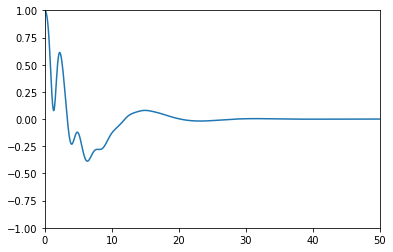

With noise:


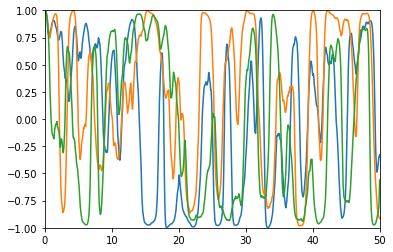

In [6]:
N_steps = 1000
N_trunc = 8
options = {
    'linear' : True,
    'use_noise' : False,
    'method' : 'TDVP2',
    'chi_max' : 10,
    'eps' : 1.e-15
}

print("Without noise:")
my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
psis = my_homps.compute_realizations(1)
sigma_zs = compute_exp_val(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
options['use_noise'] = True
my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
for i in range(3):
    psis = my_homps.compute_realizations(1)
    sigma_zs = compute_exp_val(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [7]:
N_steps = 1000
N_trunc = 16

In [9]:
options = {
    'linear' : True,
    'use_noise' : True,
    'method' : 'TDVP2',
    'chi_max' : 10,
    'eps' : 1.e-15
}
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)

In [10]:
psis_100 = hierarchy.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
psis_1000 = hierarchy.compute_realizations(N_samples=1000, progressBar=tqdm)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
sigma_zs_100 = compute_exp_val(psis_100, sigma_z)
sigma_zs_1000 = compute_exp_val(psis_1000, sigma_z)

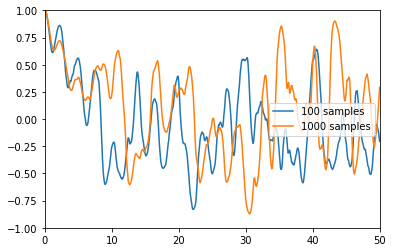

In [13]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_100, label="100 samples")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

This looks similar to the results we got from HOPS

# Convergence of N_trunc if we don't use noise

In [8]:
N_truncs = [10, 20, 30, 40, 50]
N_steps = 1000
chimax = 10
epsilon = 0
N_krylov = 20

psis_homps_N_trunc_no_noise = np.empty((len(N_truncs), 1, N_steps, 2), dtype=complex)

for n, N_trunc in enumerate(N_truncs):
    print("computing N_trunc =", N_trunc)
    hierarchy = homps.HOMPS_TDVP(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=epsilon, N_krylov=N_krylov)
    psis_homps = hierarchy.compute_realizations(1)
    psis_homps_N_trunc_no_noise[n, :, :, :] = psis_homps

computing N_trunc = 10
computing N_trunc = 20
computing N_trunc = 30
computing N_trunc = 40
computing N_trunc = 50


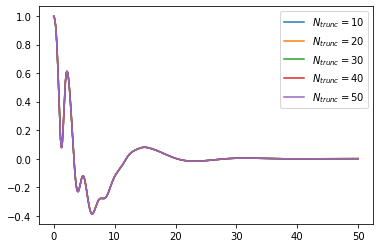

In [9]:
for n, N_trunc in enumerate(N_truncs):
    sigma_zs = compute_exp_val(psis_homps_N_trunc_no_noise[n, :, :, :], sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, label=r"$N_{trunc} = "+str(N_trunc)+"$")

plt.legend()
plt.show()